# normalizing-age

Let's apply a transformation to age, in order to make it look a little more normal.

In [1]:
%matplotlib inline
import os
import glob
import seaborn
import numpy as np
import scipy as sp
import pandas as pd
import scipy.io
import numpy.fft
import scipy.signal
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn import linear_model
mpl.rcParams['figure.figsize'] = (16, 10)

In [13]:
data = pd.read_csv('../data/pipeline-full/ya-oa-full-linreg-02-24.csv')
data.head()

,SUBJECT,OA,CLASS,AGE,SEX,AVG_OA_PSD_EYESC,AVG_OA_PSD_EYESO,AVG_YA_PSD_EYESC,AVG_YA_PSD_EYESO,AVG_PSD_EYESC,...,FRONTAL_EYESC,FRONTAL_EYESO,LTEMPORAL_EYESC,LTEMPORAL_EYESO,CENTRAL_EYESC,CENTRAL_EYESO,RTEMPORAL_EYESC,RTEMPORAL_EYESO,OCCIPITAL_EYESC,OCCIPITAL_EYESO
0,120127101,0,SA_Control,80.84873,2.0,-4.34227,-3.134892,-6.051054,-5.046973,-6.862338,...,-8.672824,-7.766009,-10.355797,-9.870920,-8.886973,-9.256354,-9.514349,-8.718649,-7.726646,-7.131687
1,120127102,0,MCI_Control,71.89870,1.0,-4.34227,-3.134892,-6.051054,-5.046973,-5.043768,...,-6.822904,-3.996478,-6.491346,-3.017757,-6.675483,-5.742492,-5.226341,-1.570847,-6.432560,-3.653080
2,120127103,0,MCI_Control,69.43463,2.0,-4.34227,-3.134892,-6.051054,-5.046973,-4.404398,...,-4.235969,-4.397806,-6.102922,-5.551192,-6.771141,-6.602679,-5.542418,-5.150955,-3.417101,-3.998930
3,120127104,0,SA_Control,83.61396,2.0,-4.34227,-3.134892,-6.051054,-5.046973,-4.147895,...,-6.391124,-4.478913,-6.255836,-5.451922,-5.435296,-4.705022,-5.914093,-4.571635,-6.477717,-5.189071
4,120127105,0,SA_Control,80.69541,2.0,-4.34227,-3.134892,-6.051054,-5.046973,-5.327249,...,-6.609690,-5.981445,-6.667336,-5.432904,-7.119155,-6.554409,-7.226378,-6.100613,-8.148066,-8.137746


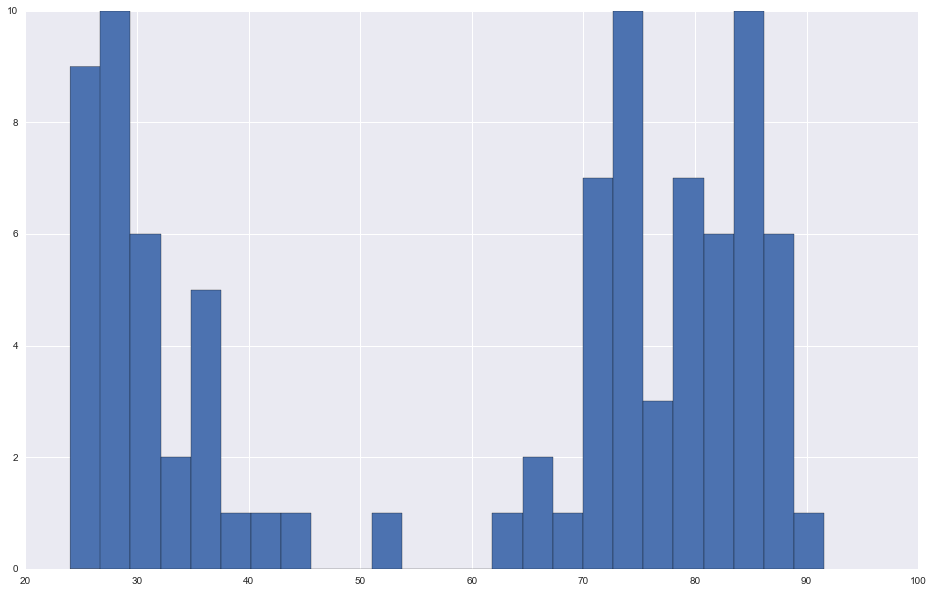

In [15]:
a, b, c = plt.hist(data.AGE, bins=25)

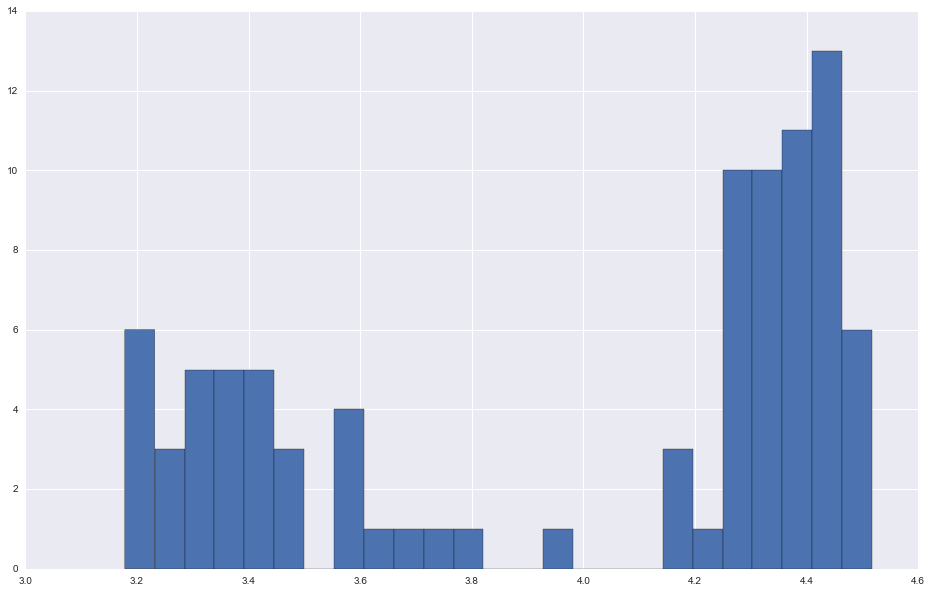

In [16]:
a, b, c = plt.hist(np.log(data.AGE), bins=25)

In [19]:
cols = list(data.columns.values)
cols.remove('SUBJECT')
cols.remove('CLASS')
cols.remove('AGE')
cols.remove('SEX')
cols.remove('OA')

X = data[cols]
y = data.OA

rlogit = linear_model.RandomizedLogisticRegression()
rlogit.fit(X, y)

print("Features sorted by score, using {} resamplings: ".format(200))
feature_list = sorted(zip(map(lambda x: round(x, 4), rlogit.scores_), cols), reverse=True)
for f in feature_list:
    print(f)

Features sorted by score, using 200 resamplings: 
(0.48999999999999999, 'FRONTAL_EYESO')
(0.45000000000000001, 'B1_EYESO')
(0.19, 'B3_EYESO')
(0.14999999999999999, 'RTEMPORAL_EYESO')
(0.085000000000000006, 'OCCIPITAL_EYESO')
(0.065000000000000002, 'AVG_PSD_EYESO')
(0.059999999999999998, 'A5_EYESO')
(0.044999999999999998, 'A30_EYESO')
(0.040000000000000001, 'B17_EYESO')
(0.040000000000000001, 'A1_EYESO')
(0.035000000000000003, 'A27_EYESO')
(0.014999999999999999, 'CENTRAL_EYESO')
(0.01, 'LTEMPORAL_EYESO')
(0.01, 'B6_EYESO')
(0.01, 'A2_EYESO')
(0.0050000000000000001, 'B2_EYESO')
(0.0050000000000000001, 'B17_EYESC')
(0.0050000000000000001, 'A21_EYESO')
(0.0050000000000000001, 'A15_EYESO')
(0.0050000000000000001, 'A14_EYESO')
(0.0, 'RTEMPORAL_EYESC')
(0.0, 'OCCIPITAL_EYESC')
(0.0, 'LTEMPORAL_EYESC')
(0.0, 'FRONTAL_EYESC')
(0.0, 'CENTRAL_EYESC')
(0.0, 'B9_EYESO')
(0.0, 'B9_EYESC')
(0.0, 'B8_EYESO')
(0.0, 'B8_EYESC')
(0.0, 'B6_EYESC')
(0.0, 'B5_EYESO')
(0.0, 'B5_EYESC')
(0.0, 'B4_EYESO')
(0.0

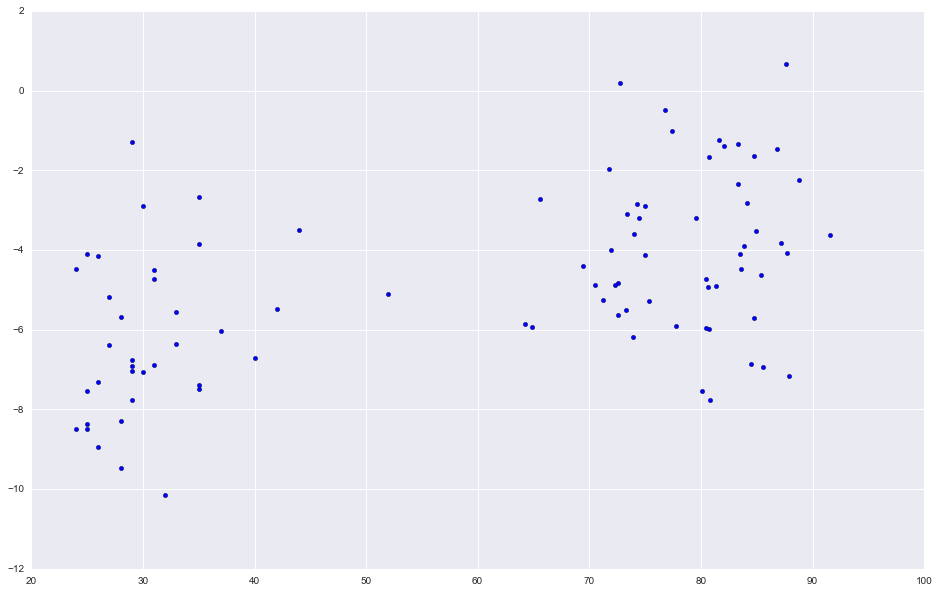

In [21]:
plt.scatter(data.AGE, data.FRONTAL_EYESO)

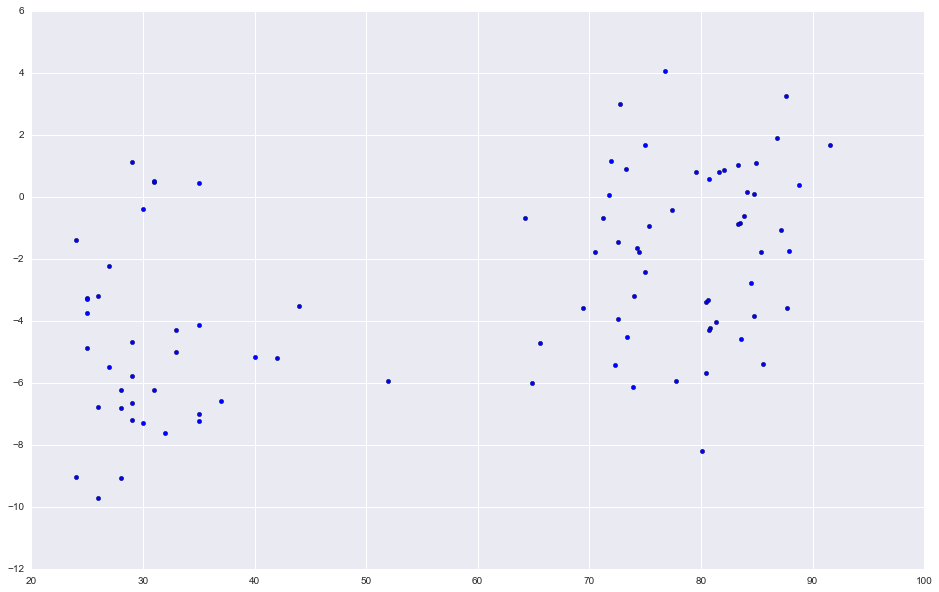

In [22]:
plt.scatter(data.AGE, data.B1_EYESO)